**Importing all the necassary libraries**

In [102]:
import pandas as pd
import numpy as np
import json
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

nltk.download('words')  
nltk.download('punkt')  

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Sherow\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sherow\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Data Analysis and Data Cleaning**

In [103]:
## Loading the Dataset from a CSV File

# Load the dataset from a CSV file into the 'df' DataFrame.
df = pd.read_csv(r'c:\YoutubeProject\US_youtube_trending_data.csv')

In [104]:
## Displaying Information About the Dataset

# Use df.info() to display details about the DataFrame, including column names and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229588 entries, 0 to 229587
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           229588 non-null  object
 1   title              229588 non-null  object
 2   publishedAt        229588 non-null  object
 3   channelId          229588 non-null  object
 4   channelTitle       229588 non-null  object
 5   categoryId         229588 non-null  int64 
 6   trending_date      229588 non-null  object
 7   tags               229588 non-null  object
 8   view_count         229588 non-null  int64 
 9   likes              229588 non-null  int64 
 10  dislikes           229588 non-null  int64 
 11  comment_count      229588 non-null  int64 
 12  thumbnail_link     229588 non-null  object
 13  comments_disabled  229588 non-null  bool  
 14  ratings_disabled   229588 non-null  bool  
 15  description        225188 non-null  object
dtypes: bool(2), int64(5)

In [105]:
## Dropping Unnecessary Columns

# Remove the 'thumbnail_link' column
df.drop('thumbnail_link', axis=1, inplace=True)

# Remove the 'video_id' column
df.drop('video_id', axis=1, inplace=True)

# Remove the 'channelId' column
df.drop('channelId', axis=1, inplace=True)

In [106]:
## Loading Video Genres from a JSON File

# Open the JSON file containing category information
with open(r'c:\YoutubeProject\US_category_id.json') as f:
    category_dict = json.load(f)  # Store category names and their numerical IDs

# Replace numerical category IDs with their corresponding category names
df['categoryName'] = df['categoryId'].astype(str).replace(category_dict)

# Drop the 'categoryId' column to retain only the category names
df = df.drop('categoryId', axis=1)

In [107]:
df.head()

,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryName
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,Brawadis,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare...",Gaming
2,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,jacksepticeye,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,False,False,I left youtube for a month and this is what ha...,Entertainment
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,XXL,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,Music
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,Mr. Kate,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,False,False,Transforming The LaBrant Family's empty white ...,Howto & Style


In [108]:
## Converting the 'title' column into a list format

# Convert all text in the 'title' column to lowercase
df['title'] = df['title'].str.lower()

# Remove semicolons, question marks, colons, and other unnecessary marks
df['title'] = df['title'].str.replace('[;?!:-]', '', regex=True)

# Split the text in the 'title' column into lists of words
df['title'] = df['title'].str.split()

In [109]:
# Creating a different dataset using only the Sports genre
dfSport = df[df['categoryName'] == 'Sports']

In [110]:
dfSport.head()

,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryName
40,"[shannon, reacts, to, kyle, kuzma's, gamewinni...",2020-08-11T16:21:47Z,Skip and Shannon: UNDISPUTED,2020-08-12T00:00:00Z,fox|fox sports|fs1|fox sports 1|undisputed|ski...,540613,7155,308,1647,False,False,LeBron and the Lakers finally snapped their 3-...,Sports
43,"[giannis, gets, ejected, after, headbutting, m...",2020-08-12T02:30:32Z,Bleacher Report,2020-08-12T00:00:00Z,bleacher report|br|nba|giannis|giannis antetok...,756814,8278,331,2441,False,False,"In a random and wild sequence of events, Giann...",Sports
47,"[trail, blazers, at, mavericks, |, full, game,...",2020-08-12T01:27:17Z,NBA,2020-08-12T00:00:00Z,NBA|G League|Basketball|game-0021901300|Jump S...,937569,10160,405,3119,False,False,TRAIL BLAZERS at MAVERICKS | FULL GAME HIGHLIG...,Sports
65,"['don't, mess, with, dame, dolla', stephen, a....",2020-08-10T15:25:12Z,ESPN,2020-08-12T00:00:00Z,first take|damian lillard|paul george|patrick ...,791489,13242,325,2728,False,False,Stephen A. Smith explains why LA Clippers SF P...,Sports
68,"[nuggets, at, lakers, |, full, game, highlight...",2020-08-11T03:53:08Z,NBA,2020-08-12T00:00:00Z,NBA|G League|Basketball|game-0021901296|Jump S...,2103682,22243,907,3946,False,False,NUGGETS at LAKERS | FULL GAME HIGHLIGHTS | Aug...,Sports


**Exploring the Relationship Between Video Popularity and Tags**

In [111]:
##Creating a different dataset with the most used words from tags column from the dfSport dataset

# Combine all tags from the 'tags' column and make them lowercase
tags_text = ' '.join(dfSport['tags']).lower()

# Remove non-alphabet characters and keep only letters and spaces
tags_text = re.sub(r'[^a-zA-Z\s]', '', tags_text)

# Tokenize the text into individual words
words = word_tokenize(tags_text)

# Count the frequency of each word
word_counts = Counter(words)

# Create a DataFrame to store the tag names and their frequencies
tag_frequencies = pd.DataFrame(word_counts.items(), columns=['Tag', 'Frequency'])

# Sort the DataFrame by frequency in descending order
tag_frequencies = tag_frequencies.sort_values(by='Frequency', ascending=False)

In [112]:
tag_frequencies

,Tag,Frequency
13,vs,18701
822,league,4483
162,highlights,3899
133,the,3509
77,on,3330
...,...,...
22344,sol,1
22343,ardiantopchoi,1
22342,openmfdcdbbbeafpfajar,1
23883,clubtour,1


In [113]:
# Calculate the total number of unique words
total_unique_words = len(word_counts)

# Calculate the top 10% threshold
top_10_percent_threshold = int(total_unique_words * 0.10)

# Filter the word counts to get the top 10% most used words
top_10_percent_words = dict(list(word_counts.items())[:top_10_percent_threshold])

# Create a DataFrame to store the top 10% most used words
top_10_percent_df = pd.DataFrame(top_10_percent_words.items(), columns=['Tag', 'Frequency'])

# Sort the DataFrame by frequency in descending order
top_10_percent_df = top_10_percent_df.sort_values(by='Frequency', ascending=False)

top_10_percent_df

,Tag,Frequency
13,vs,18701
822,league,4483
162,highlights,3899
133,the,3509
77,on,3330
...,...,...
1306,basketballkawhi,1
1307,treceplayoff,1
1308,plou,1
1309,williamsmontrezl,1


In [114]:
def clean_tag(tags):
    if tags == '[[none]]':
        return []
    # Iterate over the elements of the list and apply lower() to each element
    return [tag.lower().replace('"', '') for tag in tags.split('|')]

In [115]:
# Create a set of the top 10% most used words
top_10_percent_words_set = set(top_10_percent_words.keys())

# Function to check if any word from the top 10% is present in the tags list
def contains_top_words(tags):
    tags_list = tags.split()  # Assuming the 'tags' column is already in list format
    for tag in tags_list:
        if tag in top_10_percent_words_set:
            return 'Used'
    return 'Not Used'

# Apply the function to the 'tags' column of the dfSport DataFrame
dfSport['TagUsage'] = dfSport['tags'].apply(contains_top_words)

dfSport.head()

C:\Users\Sherow\AppData\Local\Temp\ipykernel_16848\1751660643.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSport['TagUsage'] = dfSport['tags'].apply(contains_top_words)


,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryName,TagUsage
40,"[shannon, reacts, to, kyle, kuzma's, gamewinni...",2020-08-11T16:21:47Z,Skip and Shannon: UNDISPUTED,2020-08-12T00:00:00Z,fox|fox sports|fs1|fox sports 1|undisputed|ski...,540613,7155,308,1647,False,False,LeBron and the Lakers finally snapped their 3-...,Sports,Used
43,"[giannis, gets, ejected, after, headbutting, m...",2020-08-12T02:30:32Z,Bleacher Report,2020-08-12T00:00:00Z,bleacher report|br|nba|giannis|giannis antetok...,756814,8278,331,2441,False,False,"In a random and wild sequence of events, Giann...",Sports,Used
47,"[trail, blazers, at, mavericks, |, full, game,...",2020-08-12T01:27:17Z,NBA,2020-08-12T00:00:00Z,NBA|G League|Basketball|game-0021901300|Jump S...,937569,10160,405,3119,False,False,TRAIL BLAZERS at MAVERICKS | FULL GAME HIGHLIG...,Sports,Not Used
65,"['don't, mess, with, dame, dolla', stephen, a....",2020-08-10T15:25:12Z,ESPN,2020-08-12T00:00:00Z,first take|damian lillard|paul george|patrick ...,791489,13242,325,2728,False,False,Stephen A. Smith explains why LA Clippers SF P...,Sports,Used
68,"[nuggets, at, lakers, |, full, game, highlight...",2020-08-11T03:53:08Z,NBA,2020-08-12T00:00:00Z,NBA|G League|Basketball|game-0021901296|Jump S...,2103682,22243,907,3946,False,False,NUGGETS at LAKERS | FULL GAME HIGHLIGHTS | Aug...,Sports,Not Used


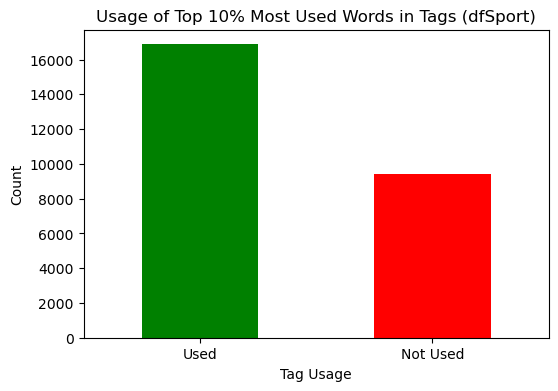

In [116]:
# Create a graph to show the count of "Used" and "Not Used" in the dfSport DataFrame
plt.figure(figsize=(6, 4))
dfSport['TagUsage'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Usage of Top 10% Most Used Words in Tags (dfSport)')
plt.xlabel('Tag Usage')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()

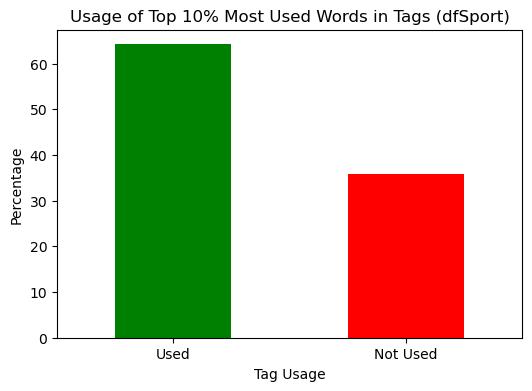

In [117]:
# Create a graph to show the count of "Used" and "Not Used" in the dfSport DataFrame
plt.figure(figsize=(6, 4))

# Calculate the percentages of "Used" and "Not Used"
tag_usage_counts = dfSport['TagUsage'].value_counts()
total_tags = len(dfSport)
percentages = tag_usage_counts / total_tags * 100

# Plot the bar chart with exact percentages
ax = percentages.plot(kind='bar', color=['green', 'red'])
ax.bar_label(ax.containers[0], fmt='%1.2f%%', color='white', weight='bold', fontsize=10)

plt.title('Usage of Top 10% Most Used Words in Tags (dfSport)')
plt.xlabel('Tag Usage')
plt.ylabel('Percentage')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()